In [3]:
# import required packages 
using DataFrames
using FreqTables
using Plots, StatPlots
using DecisionTree
using StatsModels
using MLDataUtils

#Set the backend as matplotlib.pyplot
pyplot()

Plots.PyPlotBackend()

{S}, Base.Nullable{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\NullableArrays\src\operators.jl:99.


In [30]:
# Read Dataset
data = readtable("C:/Users/veer/Desktop/Projects/Julia_In_Banking/Data/loan_data.csv")

,loan_id,member_id,home_ownership,annual_inc,loan_status,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job
1,57245,138150,OWN,54000.0,Fully Paid,1200.0,36 months,0.1311,679,0,36,5,married,freelance
2,61390,182594,MORTGAGE,148000.0,Fully Paid,4000.0,36 months,0.0788,729,0,25,8,single,partime
3,61419,182917,RENT,45000.0,Charged Off,5600.0,36 months,0.1496,669,0,22,2,married,fixed
4,62102,191024,RENT,54000.0,Fully Paid,3200.0,36 months,0.0988,744,0,25,4,married,fixed
5,66943,247802,RENT,24000.0,Fully Paid,2800.0,60 months,0.1149,709,0,26,17,married,fixed
6,68163,258249,MORTGAGE,100000.0,Fully Paid,3000.0,36 months,0.0714,749,0,22,8,married,freelance
7,69990,275254,RENT,125000.0,Fully Paid,15500.0,36 months,0.0788,784,1,29,3,single,freelance
8,290807,290804,RENT,84996.0,Fully Paid,15000.0,36 months,0.157,674,1,29,13,separated,freelance
9,347648,348254,RENT,60000.0,Fully Paid,10000.0,36 months,0.1273,714,0,22,15,single,fixed
10,348340,349269,RENT,71000.0,Fully Paid,8000.0,36 months,0.1112,714,0,26,5,married,fixed


In [31]:
# Create 02 categories for loan status
data[:loan_status_new] = ifelse.(data[:loan_status] .== "Fully Paid",0,1)
delete!(data,:loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status_new
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [32]:
rename!(data, :loan_status_new, :loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [33]:
# Delete Loan ID and Customer ID columns
delete!(data,:loan_id)
delete!(data,:member_id)

,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [34]:
# Explore Loan Amount
freqtable(data[:loan_status])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0     │ 9113
1     │ 1429

In [35]:
describe(data[:annual_inc])

Summary Stats:
Mean:           68835.898406
Minimum:        4080.000000
1st Quartile:   40000.000000
Median:         57600.000000
3rd Quartile:   81000.000000
Maximum:        6000000.000000
Length:         10542
Type:           Float64
Number Missing: 0
% Missing:      0.000000


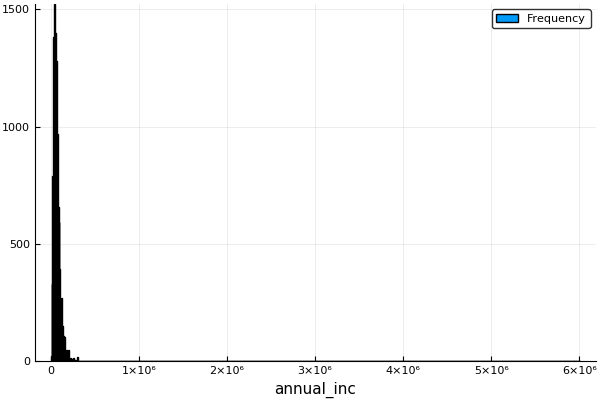

In [10]:
# Plot Histogram for Applicant Income
Plots.histogram(data[:annual_inc], bins = 1000, xlabel = "annual_inc", labels = "Frequency")

In [36]:
eltypes(data)

12-element Array{Type,1}:
 String 
 Float64
 Float64
 String 
 Float64
 Int64  
 Int64  
 Int64  
 Int64  
 String 
 String 
 Int64  

In [37]:
freqtable(data[:home_ownership])

3-element Named Array{Int64,1}
Dim1     │ 
─────────┼─────
MORTGAGE │ 4540
OWN      │  883
RENT     │ 5119

In [38]:
# Partition Data into Train and Test datasets
function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end

train,test = partitionTrainTest(data, 0.7) # 70% train

(7379×12 DataFrames.DataFrame
│ Row  │ home_ownership │ annual_inc │ loan_amnt │ term        │ int_rate │
├──────┼────────────────┼────────────┼───────────┼─────────────┼──────────┤
│ 1    │ "RENT"         │ 10200.0    │ 1000.0    │ "36 months" │ 0.1496   │
│ 2    │ "RENT"         │ 33000.0    │ 2000.0    │ "36 months" │ 0.0988   │
│ 3    │ "MORTGAGE"     │ 71500.0    │ 9250.0    │ "36 months" │ 0.1253   │
│ 4    │ "MORTGAGE"     │ 185000.0   │ 12000.0   │ "36 months" │ 0.0579   │
│ 5    │ "MORTGAGE"     │ 80000.0    │ 25000.0   │ "36 months" │ 0.178    │
│ 6    │ "RENT"         │ 38400.0    │ 23500.0   │ "36 months" │ 0.1496   │
│ 7    │ "MORTGAGE"     │ 55920.0    │ 22000.0   │ "36 months" │ 0.0788   │
│ 8    │ "MORTGAGE"     │ 105997.0   │ 12025.0   │ "60 months" │ 0.1036   │
│ 9    │ "MORTGAGE"     │ 28800.0    │ 5500.0    │ "36 months" │ 0.1273   │
│ 10   │ "MORTGAGE"     │ 73000.0    │ 17000.0   │ "36 months" │ 0.0788   │
│ 11   │ "RENT"         │ 54000.0    │ 15000.0   │ "36 mon

In [39]:
# Missing value imputation-- train
# Replace missing loan amount with median of loan amount
showcols(train)
train[isna.(train[:emp_length]),:emp_length] = floor(median(dropna(train[:emp_length])))

7379×12 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ home_ownership │ String  │ 0       │
│ 2     │ annual_inc     │ Float64 │ 0       │
│ 3     │ loan_amnt      │ Float64 │ 0       │
│ 4     │ term           │ String  │ 0       │
│ 5     │ int_rate       │ Float64 │ 0       │
│ 6     │ cibil_score    │ Int64   │ 0       │
│ 7     │ inq_last_6mths │ Int64   │ 0       │
│ 8     │ age            │ Int64   │ 0       │
│ 9     │ emp_length     │ Int64   │ 113     │
│ 10    │ marital        │ String  │ 0       │
│ 11    │ job            │ String  │ 0       │
│ 12    │ loan_status    │ Int64   │ 0       │

5.0

In [40]:
# Missing value imputation-- test
# Replace missing loan amount with median of loan amount
showcols(test)
test[isna.(test[:emp_length]),:emp_length] = floor(median(dropna(test[:emp_length])))

3163×12 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ home_ownership │ String  │ 0       │
│ 2     │ annual_inc     │ Float64 │ 0       │
│ 3     │ loan_amnt      │ Float64 │ 0       │
│ 4     │ term           │ String  │ 0       │
│ 5     │ int_rate       │ Float64 │ 0       │
│ 6     │ cibil_score    │ Int64   │ 0       │
│ 7     │ inq_last_6mths │ Int64   │ 0       │
│ 8     │ age            │ Int64   │ 0       │
│ 9     │ emp_length     │ Int64   │ 48      │
│ 10    │ marital        │ String  │ 0       │
│ 11    │ job            │ String  │ 0       │
│ 12    │ loan_status    │ Int64   │ 0       │

5.0

In [44]:
# Build Logistic Regression Model
# Pkg.add("GLM")
# Load GLM Library
using GLM

In [ ]:
# Build Logistic Regression Model
model_LG = glm(@formula(loan_status ~ annual_inc + loan_amnt + int_rate + cibil_score + inq_last_6mths
        + age + emp_length + Rent + Mortgage + _36_months + married + single + job_fixed + job_freelance
        + job_parttime), train, Binomial(), ProbitLink())

In [ ]:
# Confusion Matrix
confint(model_LG)

In [48]:
train

,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,RENT,10200.0,1000.0,36 months,0.1496,689,0,28,12,widow,fixed,1
2,RENT,33000.0,2000.0,36 months,0.0988,709,1,26,16,married,others,0
3,MORTGAGE,71500.0,9250.0,36 months,0.1253,694,1,21,1,married,fixed,0
4,MORTGAGE,185000.0,12000.0,36 months,0.0579,759,0,23,7,married,fixed,0
5,MORTGAGE,80000.0,25000.0,36 months,0.178,674,1,33,0,married,fixed,1
6,RENT,38400.0,23500.0,36 months,0.1496,704,2,28,6,married,freelance,0
7,MORTGAGE,55920.0,22000.0,36 months,0.0788,794,0,30,13,single,fixed,0
8,MORTGAGE,105997.0,12025.0,60 months,0.1036,714,0,23,3,married,fixed,0
9,MORTGAGE,28800.0,5500.0,36 months,0.1273,689,0,22,2,single,partime,0
10,MORTGAGE,73000.0,17000.0,36 months,0.0788,774,1,41,2,married,freelance,0


In [ ]:
# Build Decision Tree Model
y_train = train[:,:loan_status]
X_train = train[:,[1,2,3,4,5,6,7,8,9,10,11]]
y_test = test[:,:loan_status]
X_test = test[:,[1,2,3,4,5,6,7,8,9,10,11]]

In [ ]:
# Undersampling the training dataset
X_train, y_train = undersample((X_train, y_train), shuffle = true)

In [ ]:
# Build Tree
# Train full-tree classifier
model_DT = build_tree(y_train, X_train)

# Prune tree: merge leaves having >= 90% combined purity (default: 100%)
model_DT = prune_tree(model, 0.9)

# print the tree, to a depth of 5 nodes
print_tree(model_DT, 5)

In [ ]:
# test on the Test dataset
y_pred1 = apply_tree(model_DT, X_test1)

In [ ]:
freqtable(y_test1,y_pred1)

In [ ]:
using RCall

In [ ]:
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/inal/JuliaModelCreditLog.rds",model_Log)

In [ ]:
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/inal/JuliaModelCreditDT.rds",model_DT)